1) Generate random price history of stocks
- Write a function which generates a pandas dataframe with a single column called "price"


Method: 
Assume rate of change of price is normally distributed with Mean = 0 and Std. Deviation = 0.1.
                        (price(t+1)-price(t))/price(t)   ~    N(0 ,0.1)

price (t = 0) = 1.0
Note: Discard the series if any price goes <=0 

(price(t+1)-price(t))/price(t)   ~ N(0 ,0.1)

We need to generate a Normal distribute and then sequence a series of prices over it.

In [1]:
365*100 + (100//4)

36525

There are 36525 days in a 100 years

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class norm1:
    def __init__(self, a1, b1, c1):
        self.a1 = a1 # Mean
        self.b1 = b1 # SD
        self.c1 = c1 # Bins for a histogram - frequency of that interval
        
    def dist_curve(self):
#         fig = plt.figure(figsize=(15,4))
        plt.plot(self.c1, 
                 1/(self.b1 * np.sqrt(2 * np.pi)) * np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ),
                 linewidth=2,
                 color='r')
        plt.show()

C:\Users\janu\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


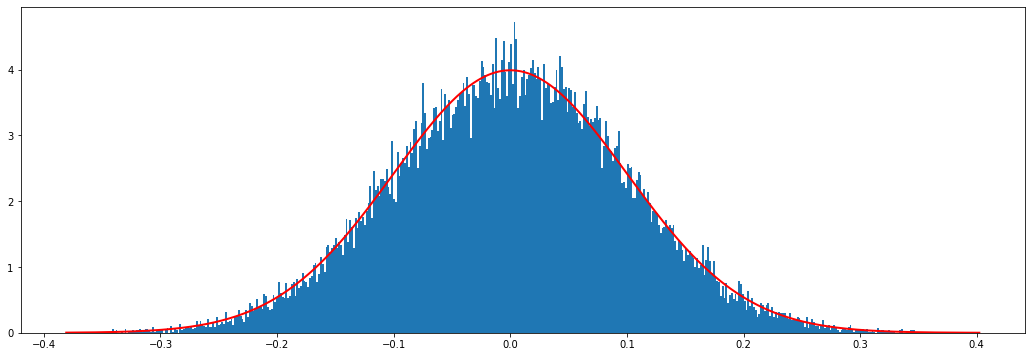

In [4]:
#Vary the mean and SD to generate different plots
mean1 = 0 #given
sd1 = 0.1 #given
no = 36525
c = np.random.normal(loc = mean1, scale = sd1, size = no) # gives normal distribution values at random
# plot to see if the values belong to normal distribution
fig = plt.figure(figsize=(18,6))
n, bins, patches = plt.hist(c, 500, normed=True) #hist
hist1 = norm1(mean1, sd1, bins)
plot1 = hist1.dist_curve()

In [5]:
len(c), len(bins) # 36525 values were grouped into 501 intervals

(36525, 501)

Plot the values of Normal distribution themselves

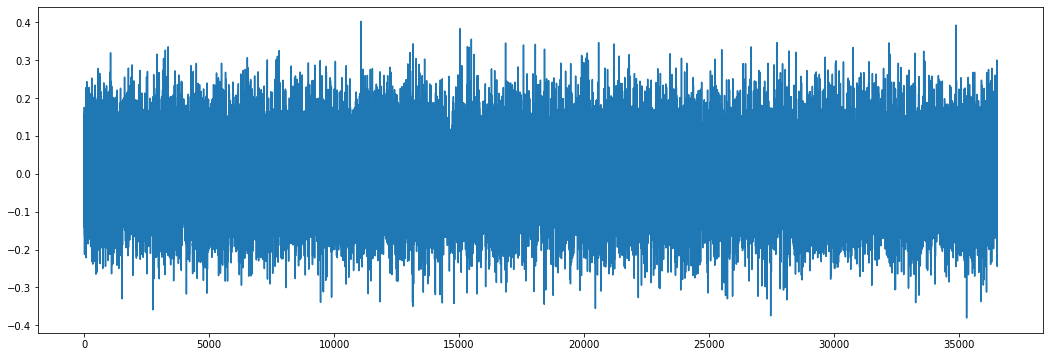

In [6]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(c)),c)

In [7]:
min(c), max(c), len(c)

(-0.3808345370294352, 0.4022203941481126, 36525)

In [8]:
c = np.round(c, 4)

C:\Users\janu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


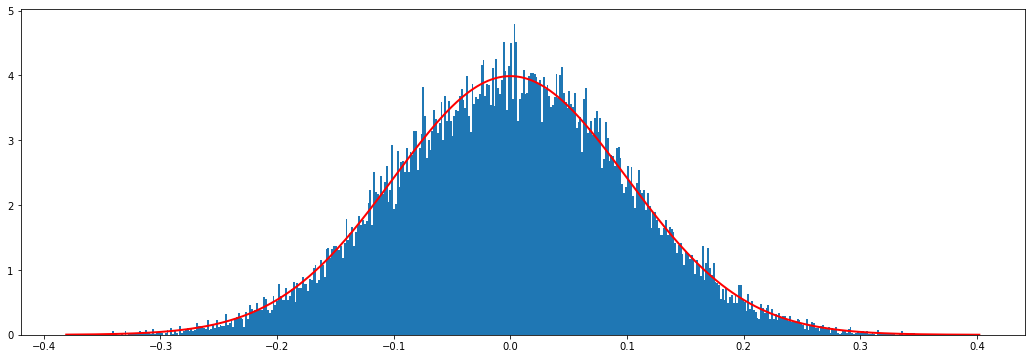

In [9]:
fig = plt.figure(figsize=(18,6))
n, bins, patches = plt.hist(c, 500, normed=True) #hist
hist1 = norm1(mean1, sd1, bins)
plot1 = hist1.dist_curve()

In [10]:
len(c), len(bins) # 36525 values were grouped into 501 intervals

(36525, 501)

Plot the values of Normal distribution themselves

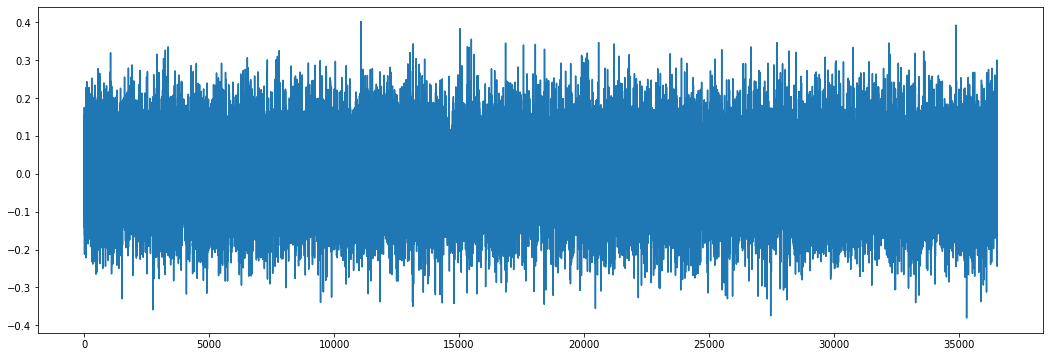

In [11]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(c)),c)

In [12]:
min(c), max(c), len(c)

(-0.3808, 0.4022, 36525)

In [13]:
count = 0
for i in c:
    if i <= 0:
        count = count + 1
count

18112

In [14]:
p = [1.0] * no

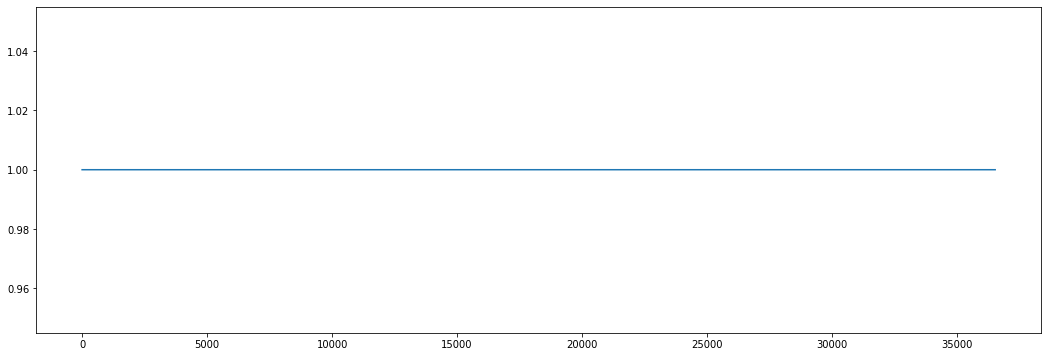

In [15]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p)), p)

In [16]:
for i in range(0,no):
    if i == 0:
        p[i] = 1.0
    else:
        p[i] = (p[i-1] * c[i-1]) *+ p[i-1]

In [17]:
min(p), max(p)

(-3.195033759276824e-08, 1.0)

In [18]:
p = np.round(p,4)

Plotting the generated prices

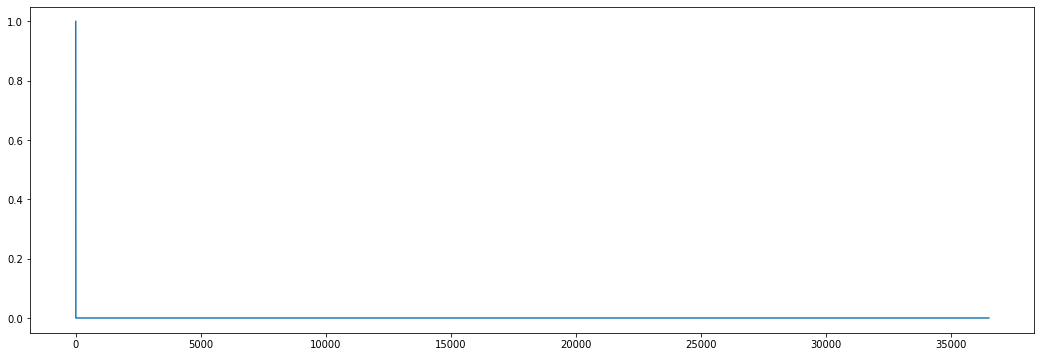

In [19]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p)), p)

In [20]:
min(p), max(p)

(-0.0, 1.0)

In [21]:
count = 0
for i in p:
    if i <= 0:
        count = count + 1
count

36522

This Is Not Working!!!

_____________________________________________________________________________________________________________________________

# Strategy:
    
    Keep generating values of for every price < = 0 

In [22]:
i = 0

In [23]:
c1 = [0]*no
p1 = [1.0]*no

In [24]:
np.random.normal(loc = mean1, scale = sd1, size = 1), type(np.random.normal(loc = mean1, scale = sd1, size = 1))

(array([0.08558224]), numpy.ndarray)

In [25]:
np.round(np.random.normal(loc = mean1, scale = sd1, size = 1),4), type(np.round(np.random.normal(loc = mean1, scale = sd1, size = 1),4))

(array([-0.0058]), numpy.ndarray)

In [26]:
float(np.round(np.random.normal(loc = mean1, scale = sd1, size = 1),4)), type(float(np.round(np.random.normal(loc = mean1, scale = sd1, size = 1),4)))

(-0.0512, float)

In [27]:
np.float(np.round(np.random.normal(loc = mean1, scale = sd1, size = 1),4)), type(np.float(np.round(np.random.normal(loc = mean1, scale = sd1, size = 1),4)))

(-0.0059, float)

In [28]:
while i!= no:
    
    c_value = np.round(np.random.normal(loc = mean1, scale = sd1, size = 1), 4)
    
    if c_value != 0:
    
        if i == 0:

            p1[i] = 1.0
            c1[i] = c_value
            i = i+1

        else:

            price = np.round((
                                p1[i-1] * 
                                c_value) + 
                                p1[i-1], 4)

            if price > 0:

                p1[i] = float(price)
                c1[i] = c_value
                i = i+1

In [29]:
min(c1), max(c1), len(c1)

(array([-0.4259]), array([0.4162]), 36525)

In [30]:
min(p1), max(p1), len(p1)

(0.0001, 14.8352, 36525)

In [31]:
count = 0
for i in c1:
    if i == 0:
        count = count + 1
count

0

In [32]:
count = 0
for i in p1:
    if i <= 0:
        count = count + 1
count

0

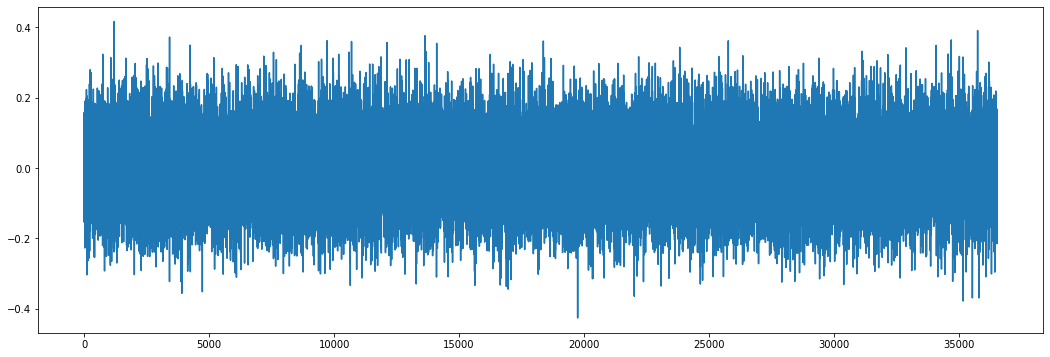

In [33]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(c1)), c1)

Plotting the generated prices

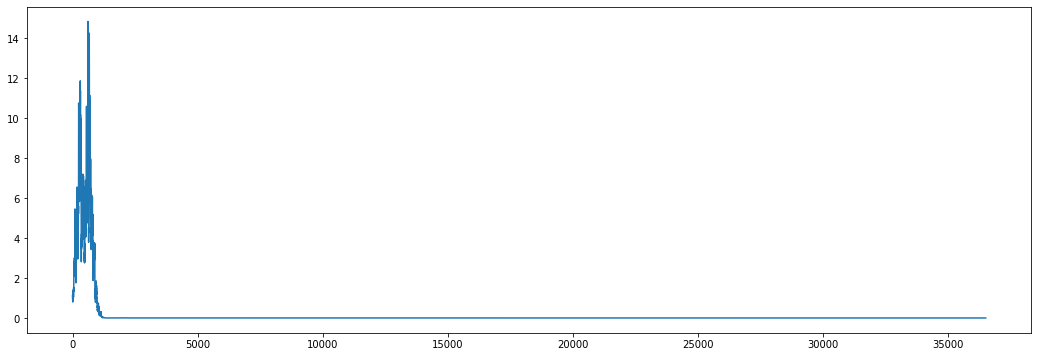

In [34]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p1)), p1)

______________________________________________________________________________________________________________________________

In this Strategy I have avoided zeroes in c 

N I will avoid negatives too...

In [35]:
i = 0
c1 = [0]*no
p1 = [1.0]*no

In [36]:
while i!= no:
    
    c_value = np.round(np.random.normal(loc = mean1, scale = sd1, size = 1), 4)
    
    if c_value > 0:
    
        if i == 0:

            p1[i] = 1.0
            c1[i] = c_value
            i = i+1

        else:

            price = np.round(
                               (p1[i-1] * 
                                c_value) + 
                                p1[i-1], 4)

            if price > 0:

                p1[i] = float(price)
                c1[i] = c_value
                i = i+1

C:\Users\janu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


In [37]:
min(c1), max(c1), len(c1)

(array([0.0001]), array([0.4376]), 36525)

In [38]:
min(p1), max(p1), len(p1)

(1.0, inf, 36525)

In [39]:
count = 0
for i in c1:
    if i <= 0:
        count = count + 1
count

0

In [40]:
count = 0
for i in p1:
    if i <= 0:
        count = count + 1
count

0

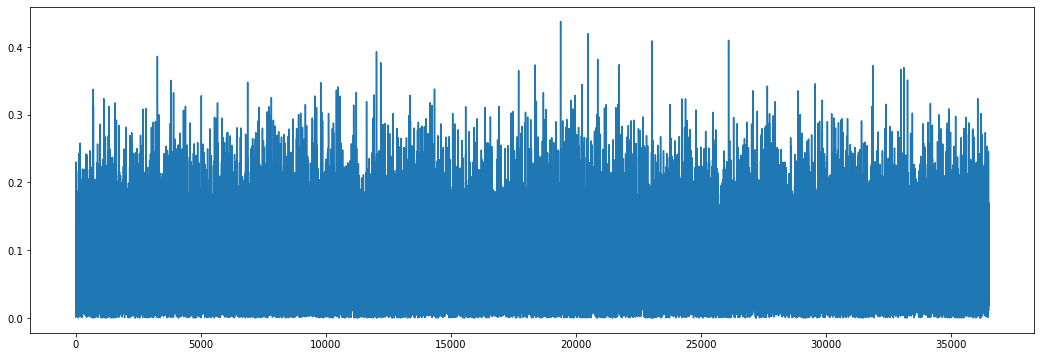

In [41]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(c1)), c1)

Plotting the generated prices

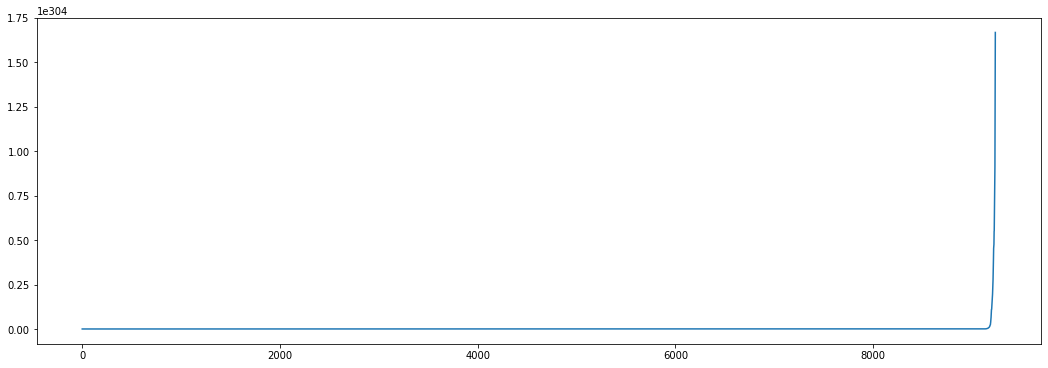

In [42]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p1)), p1)